# =============================================

---



# Errata / previous work
\

> Loss is much better than the previous model, but accuracy has slightly fallen.
>
>|previous test loss: 1.14||current test loss: 0.70|
>|----|----|----|
>|previous test acc: 0.77||current test acc: 0.73|

In [0]:
# instantiate variables for true and predicted arrays
y_true=test_generator.classes

y_pred = model_c.predict_generator(test_generator)
y_pred = np.rint(y_pred)

In [0]:
# summing predictions
print("Predicted 'NORMAL': ", sum(1 for i in y_pred if i == 0))
print("Predicted 'PNEUMONIA':", sum(1 for i in y_pred if i == 1))

Predicted 'NORMAL':  624
Predicted 'PNEUMONIA': 0


In [0]:
# from sklearn.metrics import confusion_matrix, classification_report
# viewing classification report
# print(classification_report(y_true, y_pred, labels=[0,1]))

## Model 2

Let's try:
* more layers
* add dropout layers after each pooling layer

In [0]:
model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, (2, 2), activation='relu',
                        input_shape=(150, 150, 3)))
model_2.add(layers.MaxPooling2D(pool_size=(3,3))), 

model_2.add(layers.Conv2D(64, (2,2), activation='relu')), 
model_2.add(layers.MaxPooling2D(pool_size=(3,3))), 

model_2.add(layers.Conv2D(128, (3,3), activation='relu')), 
model_2.add(layers.MaxPooling2D(pool_size=(2,2))),

model_2.add(layers.Conv2D(128, (2,2), activation='relu')), 
model_2.add(layers.MaxPooling2D(pool_size=(2,2))), 

model_2.add(layers.Flatten()), 
model_2.add(layers.Dropout(0.15)), 

model_2.add(layers.Dense(512, activation='relu')), 
model_2.add(layers.Dropout(0.15)), 

model_2.add(layers.Dense(256, activation='relu')), 
model_2.add(layers.Dense(1, activation='sigmoid'))

* Change the optimizer to `Adam`
* use 'accuracy' metrics

In [0]:
# compiling the model
model_2.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [0]:
# creating callback checkpoints
my_callbacks = [
    EarlyStopping(patience=10, verbose=1), # lowered patience
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint(filepath = f_path + 'p3_model_2.h5', 
    verbose=1, save_best_only=True, save_weights_only=False) 
    ]

Trade `steps_per_epoch` and `epochs` values, to train longer per epoch.

In [0]:
# training and evaluating the model
# using the callback in the `model.fit`
history_2 = model_2.fit_generator(train_generator, 
                              shuffle=True, 
                              steps_per_epoch=39, 
                              epochs=16, 
                              validation_data=validation_generator, 
#                              validation_steps=50, 
#                              class_weight=class_weights,
                              callbacks = my_callbacks)

Epoch 1/16
39/39 [==============================] - 313s 8s/step - loss: 1.9527 - acc: 0.6451 - val_loss: 0.6925 - val_acc: 0.5000

Epoch 00001: val_loss improved from inf to 0.69250, saving model to ./models/p3_model_2.h5
Epoch 2/16
39/39 [==============================] - 315s 8s/step - loss: 0.5016 - acc: 0.7770 - val_loss: 0.6912 - val_acc: 0.5000

Epoch 00002: val_loss improved from 0.69250 to 0.69115, saving model to ./models/p3_model_2.h5
Epoch 3/16
39/39 [==============================] - 316s 8s/step - loss: 0.3437 - acc: 0.8506 - val_loss: 0.6906 - val_acc: 0.5000

Epoch 00003: val_loss improved from 0.69115 to 0.69062, saving model to ./models/p3_model_2.h5
Epoch 4/16
39/39 [==============================] - 315s 8s/step - loss: 0.2847 - acc: 0.8780 - val_loss: 0.6987 - val_acc: 0.5000

Epoch 00004: val_loss did not improve from 0.69062
Epoch 5/16
39/39 [==============================] - 315s 8s/step - loss: 0.2593 - acc: 0.8900 - val_loss: 0.6851 - val_acc: 0.5000

Epoch 00

In [0]:
val_loss, val_acc = model_2.evaluate_generator(validation_generator, 
                                               steps=50)

print('val loss:', val_loss)
print('val acc:', val_acc)

val loss: 0.6920414566993713
val acc: 0.5


In [0]:
# download the model
files.download('./models/p3_model_2.h5')

In [0]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 149, 149, 32)      416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 6, 6, 128)        

__Visualize Training Results__

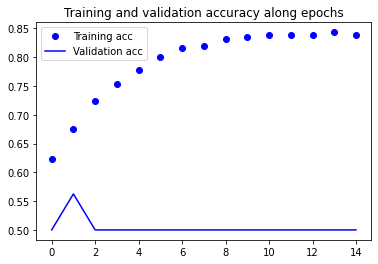

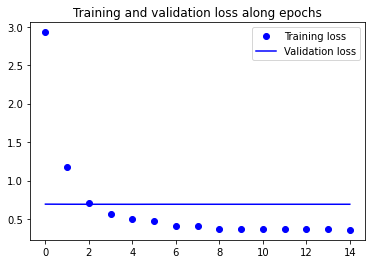

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy along epochs')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss along epochs')
plt.legend()
plt.show()

> Early stopping may have been a bit premature, for this model, as measures do not appear to have settled into a definitive trend.

### Evaluate Model 2 on Test Data

In [0]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')

test_loss, test_acc = model_2.evaluate_generator(test_generator, steps=50)

print('test loss:', test_loss)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
test loss: 0.6922323703765869
test acc: 0.6189024448394775


>The second model performed poorly.

__Plot Confusion Matrix__

In [0]:
# viewing classification report
# from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.35      0.26      0.30       234
           1       0.61      0.71      0.66       390

    accuracy                           0.54       624
   macro avg       0.48      0.48      0.48       624
weighted avg       0.51      0.54      0.52       624



In [0]:
# from sklearn.metrics import confusion_matrix
# instantiate variables for true and predicted arrays
y_true=test_generator.classes

y_pred = model_2.predict_generator(test_generator)
y_pred = np.rint(y_pred)

Call on the custom function to measure performance

In [0]:
#viewing performance measures
perf_measure(y_true, y_pred)

TN = 61
TP = 276
FN = 114
FP = 173



[[  0 234]
 [  0 390]]


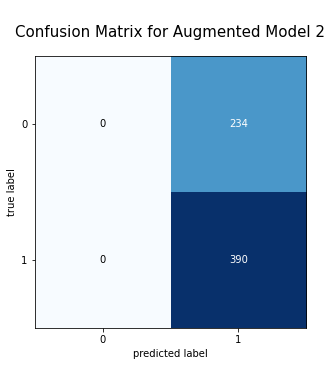

In [0]:
labels = [0,1]
CM = confusion_matrix(y_true, y_pred, labels)

fig, ax = plot_confusion_matrix(conf_mat=CM , 
                                figsize=(5, 5), 
                                hide_ticks=False, 
                                cmap=plt.cm.Blues)

ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
print(CM) 

plt.title("\nConfusion Matrix for Augmented Model 2", 
          fontsize=15)
fig.savefig("aug_model_2_CM", dpi=100)
plt.show()

In [0]:
# from sklearn.metrics import confusion_matrix
y_true=test_generator.classes
print(y_true)

y_pred = model_2.predict_generator(test_generator)
y_pred = np.rint(y_pred)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

>It looks as though the training labels did not shuffle as expected.

## Model 3

* trying fewer layers and fewer dropouts
* add dropout layers after each pooling layer

In [0]:
# building the a 2nd CNN model
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same",
                        input_shape=(150, 150, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(Dropout(0.25))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Flatten() )# this converts 3D feature maps to 1D vectors
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

* Change the optimizer to `Adam`
* use 'accuracy' metrics

In [0]:
# compiling the model
model_3.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

>Import keras modules: 
* to stop training when a monitored quantity has stopped improving
* to save the model after every epoch
* to reduce learning rate when a metric has stopped improving


In [0]:
# importing keras modules
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [0]:
# increase early stopping patience

In [0]:
# updating callback checkpoints
f_path = './models/'
my_callbacks = [
    EarlyStopping(patience=7, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint(filepath = f_path + 'p3_model_3.h5', 
    verbose=1, save_best_only=True, save_weights_only=False) 
    ]

In [0]:
# training and evaluating the model
# using the callback in the `model.fit`
history_3 = model_3.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50, 
                              callbacks = my_callbacks)

Epoch 1/30
100/100 [==============================] - 223s 2s/step - loss: 10.3657 - acc: 0.6851 - val_loss: 0.6920 - val_acc: 0.6250

Epoch 00001: val_loss improved from inf to 0.69203, saving model to ./models/p3_model_3.h5
Epoch 2/30
100/100 [==============================] - 210s 2s/step - loss: 0.5616 - acc: 0.7814 - val_loss: 0.6916 - val_acc: 0.6875

Epoch 00002: val_loss improved from 0.69203 to 0.69161, saving model to ./models/p3_model_3.h5
Epoch 3/30
 14/100 [===>..........................] - ETA: 1:59 - loss: 0.4875 - acc: 0.7927

In [0]:
model_3.summary()

NameError: ignored

__Visualize Training Results__

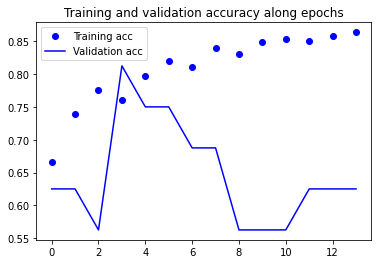

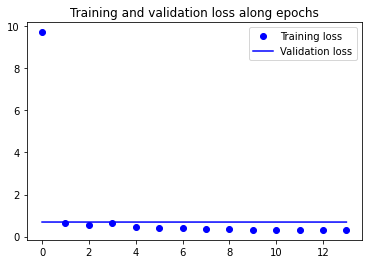

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy along epochs')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss along epochs')
plt.legend()
plt.show()

In [0]:
val_loss, val_acc = model_3.evaluate_generator(validation_generator, 
                                               steps=50)

print('val loss:', val_loss)
print('val acc:', val_acc)

val loss: 0.691329300403595
val acc: 0.625


> Acurracy droped from the previous model.

__Plot Confusion Matrix__

In [0]:
# from sklearn.metrics import confusion_matrix
y_true=validation_generator.classes
print(y_true)

y_pred = model_3.predict_generator(validation_generator)
y_pred = np.rint(y_pred)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
CM = confusion_matrix(y_true, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CM , 
                                figsize=(7, 7), 
                                hide_ticks=True, 
                                cmap=plt.cm.Blues)
# plt.xticks(range(len(classes)), classes, fontsize=12)
# plt.yticks(range(len(classes)), classes, fontsize=12)
plt.title("Confusion Matrix for ...: \n") #+model_title, fontsize=11
# fig.savefig(image_file_name_CM, dpi=100)
plt.show()

NameError: ignored

In [0]:
# download the model
files.download('./models/p3_model_3.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 36166, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

### Evaluate Model 3 on Test Data

In [0]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')

test_loss, test_acc = model_3.evaluate_generator(test_generator, steps=50)

print('test loss:', test_loss)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
test loss: 0.688644528388977
test acc: 0.6707317233085632


>The accuracy score for test data is even (slightly) lower than that of the second model.